In [102]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt

my_arr = np.array([0.9, -0.9, 4.3, 2.9, 1.2, 3.0, 2.7, 0.6, 3.6, -0.5])

In [103]:
n = len(my_arr)
Xn_bar = np.mean(my_arr)
unbsd_sigma2 = np.var(my_arr, ddof=1)
Tn = np.sqrt(n) * (Xn_bar / np.sqrt(unbsd_sigma2))

print("Tn =", Tn)

Tn = 3.183538302218873


In [104]:
print(st.t.cdf(-Tn, df=n-1))

0.005560692749284683


In [105]:
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24

In [106]:
print("Xn_bar =", Xs.mean())
print("Yn_bar =", Ys.mean())

Xn_bar = 0.9199250000000001
Yn_bar = 425.6175


In [107]:
print("s_x =", Xs.std(ddof=1))
print("s_y =", Ys.std(ddof=1))

s_x = 0.6533948258734996
s_y = 348.7336574977229


In [108]:
sample_cov = np.sum((Xs - Xs.mean()) * (Ys - Ys.mean())) / (len(Xs) - 1)
sample_cov

191.20706528260868

In [109]:
r = sample_cov / (Xs.std(ddof=1) * Ys.std(ddof=1))
r

0.8391399162310663

In [110]:
beta_1 = r * Ys.std(ddof=1) / Xs.std(ddof=1)
print(beta_1)

447.87059914099837


In [111]:
beta_0 = Ys.mean() - beta_1 * Xs.mean()
beta_0

13.610139085217043

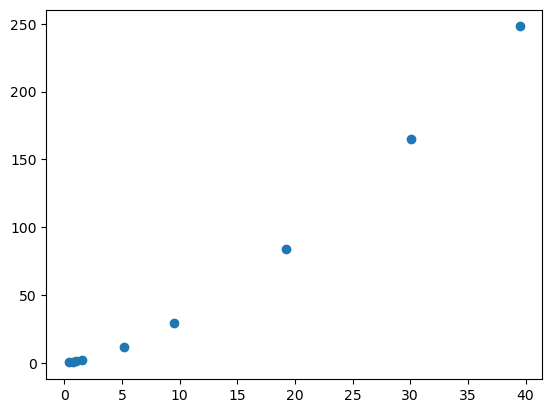

In [112]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

plt.scatter(Xs, Ys)

In [113]:
r = np.corrcoef(Xs, Ys)[0, 1]
r

0.9888323018726733

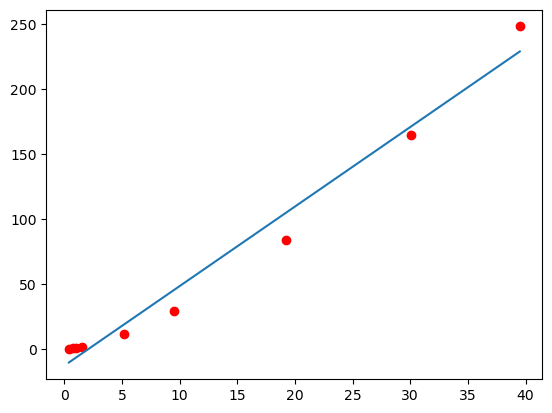

In [114]:
beta_1 = r * Ys.std(ddof=1) / Xs.std(ddof=1)
beta_0 = Ys.mean() - beta_1 * Xs.mean()
Yhats = beta_0 + beta_1 * Xs

plt.scatter(Xs, Ys, color="red")
plt.plot(Xs, Yhats)

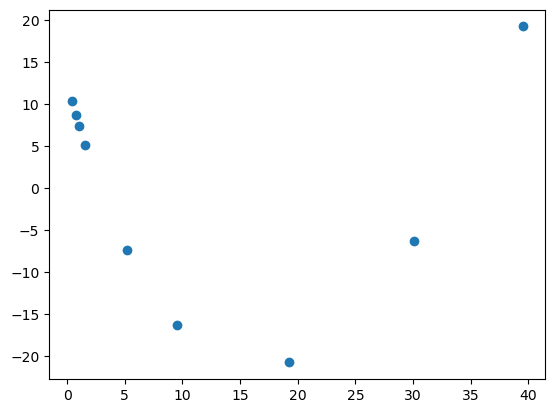

In [115]:
resids = Ys - Yhats
plt.scatter(Xs, resids)

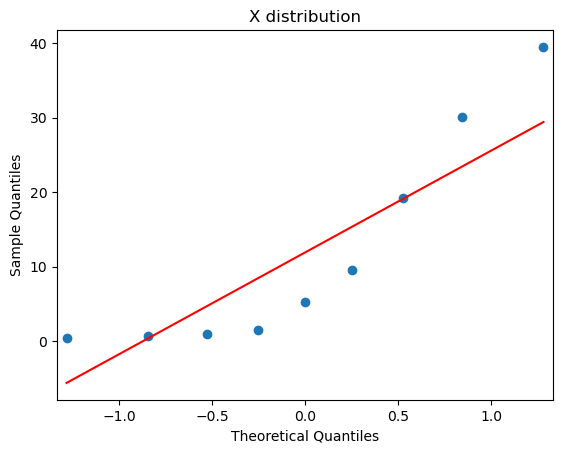

In [116]:
import statsmodels.api as sm
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

In [117]:
log_Xs = np.log(Xs)
log_Ys = np.log(Ys)

r_log = np.corrcoef(log_Xs, log_Ys)[0, 1]
r_log

0.9999998085102114

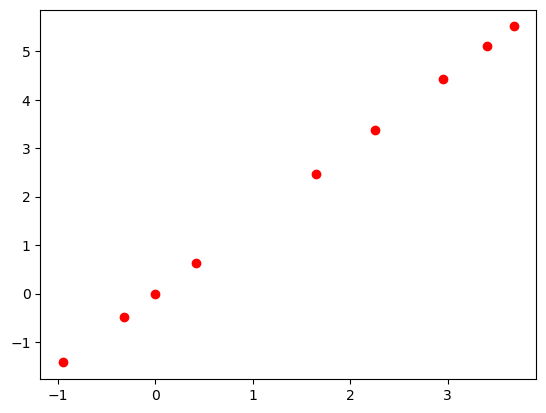

In [118]:
plt.scatter(log_Xs, log_Ys, color="red")

beta_1_log = 1.4995325773381893
beta_0_log = 0.0013370447605036695


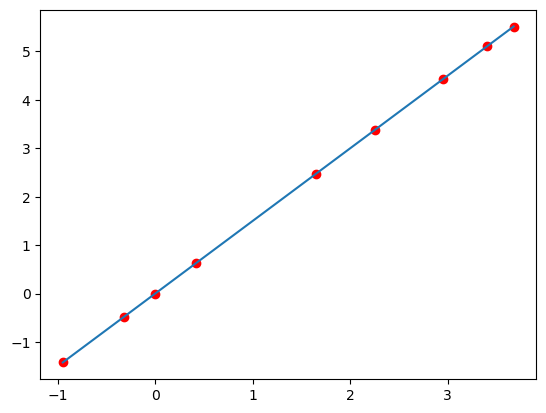

In [119]:
beta_1_log = r_log * log_Ys.std(ddof=1) / log_Xs.std(ddof=1)
beta_0_log = log_Ys.mean() - beta_1_log * log_Xs.mean()
print("beta_1_log =", beta_1_log)
print("beta_0_log =", beta_0_log)

Yhats_log = beta_0_log + beta_1_log * log_Xs

plt.scatter(log_Xs, log_Ys, color="red")
plt.plot(log_Xs, Yhats_log)

In [120]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30

$\mathbb{y}:$ LogPlanetMass

$\mathbb{y} = \mathbb{X} \beta + \epsilon$

In [121]:
y = LogPlanetMass
X = np.array([np.ones(N), LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat.tolist()

[0.15379302910641113,
 1.4021453820163157,
 -0.1409981848603533,
 -1.5995136396867409,
 -0.9561091899539219,
 -0.46176233847513737]

In [124]:
y_hat = X @ beta_hat
p = 5

Sigma = np.outer(beta_hat, beta_hat)
print("Sigma =", Sigma)

p_values_dict = {}
sigma2_hat = ((y - y_hat).T @ (y - y_hat)) / (N-p)  # unbiased sample variance estimator
print("sigma2_hat =", sigma2_hat)
print("sample std =", (y - y_hat).std(ddof=N-p))

for idx, beta_j in enumerate(beta_hat):
    print(f"beta_{idx} =", beta_j)
    Tn = beta_j / (np.sqrt(sigma2_hat * Sigma[idx, idx]))
    print(f"Tn_{idx} =", Tn)
    p_values_dict[f"beta_{0}"] = 2 * (1 - st.t.cdf(np.abs(Tn), df=N-p))
    
print(p_values_dict)

Sigma = [[ 0.0236523   0.21564019 -0.02168454 -0.24599405 -0.14704293 -0.07101583]
 [ 0.21564019  1.96601167 -0.19769995 -2.24275066 -1.34060409 -0.64745793]
 [-0.02168454 -0.19769995  0.01988049  0.22552852  0.13480966  0.06510765]
 [-0.24599405 -2.24275066  0.22552852  2.55844388  1.52930969  0.73859516]
 [-0.14704293 -1.34060409  0.13480966  1.52930969  0.91414478  0.44149522]
 [-0.07101583 -0.64745793  0.06510765  0.73859516  0.44149522  0.21322446]]
sigma2_hat = 1.1613835679478448
sample std = 2.4097547260539245
beta_0 = 0.15379302910641113
Tn_0 = 0.9279234742539321
beta_1 = 1.4021453820163157
Tn_1 = 0.927923474253932
beta_2 = -0.1409981848603533
Tn_2 = -0.927923474253932
beta_3 = -1.5995136396867409
Tn_3 = -0.927923474253932
beta_4 = -0.9561091899539219
Tn_4 = -0.9279234742539318
beta_5 = -0.46176233847513737
Tn_5 = -0.927923474253932
{'beta_0': 0.3623201193754686}
